In [41]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [10]:
train = pd.read_csv('./data/train.csv', index_col='id')

In [15]:
train.head()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
id,,,,,,,,,,,,,,,,,,,,,
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


In [19]:
train.columns

Index(['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39',
       'Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09',
       'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18'],
      dtype='object')

In [20]:
train.shape

(4752, 59)

In [21]:
submission = pd.read_csv('./data/sample_submission.csv', index_col='id')

In [22]:
submission.head()

,Y18
id,
4752,0
4753,0
4754,0
4755,0
4756,0


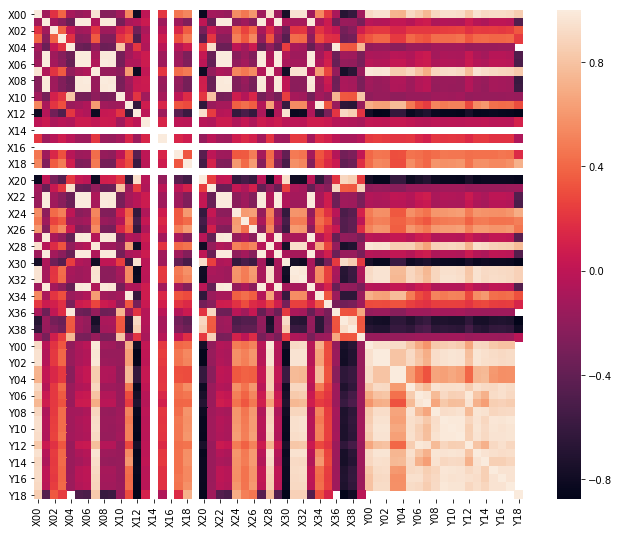

In [24]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True)

In [25]:
## 데이터 Y00 ~ Y17 와 Y18 과의 상관관계를 알기위해선
## 1. X** 데이터들을 기준으로 모델을 만들고 Y18 과 비슷한 결과가 나오는 데이터를 참고한다
##      문제가 있었는데... X** 데이터와 Y와의 상관관계를 보면 Y18과 상관관계를 가지는게 차이점이 있었음
## 2. Y00 ~ Y17 의 모델을 만들고 Y00 ~ Y17 이 없는 데이터에 데이터를 씌운다
##      근데 결과적으로 Y00 ~ Y17 과 Y18은 아무 상관 없지 않나?


train

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
X00,1.000000,-0.125318,0.187422,0.388658,-0.102449,-0.165298,-0.133505,0.957922,-0.239435,-0.235810,...,0.947931,0.945833,0.933180,0.825280,0.951228,0.911123,0.925800,0.923968,0.911654,0.847230
X01,-0.125318,1.000000,-0.122451,-0.226856,-0.363102,0.995697,0.995284,-0.059634,0.987957,0.991629,...,-0.042439,-0.050392,-0.062122,0.057221,-0.037311,-0.073472,0.002593,0.000700,-0.021005,-0.469845
X02,0.187422,-0.122451,1.000000,0.384300,0.025746,-0.131678,-0.112008,0.198243,-0.140902,-0.129738,...,0.241849,0.247088,0.262543,0.189030,0.236501,0.224425,0.232529,0.218184,0.238439,0.346297
X03,0.388658,-0.226856,0.384300,1.000000,0.188856,-0.235420,-0.214740,0.355041,-0.261806,-0.263334,...,0.426960,0.427815,0.447519,0.336190,0.412935,0.420211,0.392503,0.396692,0.413540,0.234911
X04,-0.102449,-0.363102,0.025746,0.188856,1.000000,-0.353487,-0.379444,-0.191255,-0.361236,-0.345636,...,-0.121652,-0.122650,-0.115254,-0.164212,-0.151304,-0.156865,-0.153884,-0.147818,-0.144852,NaN
X05,-0.165298,0.995697,-0.131678,-0.235420,-0.353487,1.000000,0.993846,-0.103208,0.991330,0.989875,...,-0.072905,-0.080399,-0.091581,0.035797,-0.073360,-0.109260,-0.027569,-0.028577,-0.048998,-0.484978
X06,-0.133505,0.995284,-0.112008,-0.214740,-0.379444,0.993846,1.000000,-0.062162,0.993103,0.987592,...,-0.045675,-0.051605,-0.063097,0.049745,-0.034837,-0.064839,-0.000912,-0.004289,-0.022919,-0.502424
X07,0.957922,-0.059634,0.198243,0.355041,-0.191255,-0.103208,-0.062162,1.000000,-0.170789,-0.167017,...,0.923403,0.931275,0.911746,0.778135,0.958731,0.931548,0.906402,0.891921,0.885659,0.832904
X08,-0.239435,0.987957,-0.140902,-0.261806,-0.361236,0.991330,0.993103,-0.170789,1.000000,0.991651,...,-0.152035,-0.157565,-0.167390,-0.045518,-0.142347,-0.166945,-0.106324,-0.108664,-0.125352,-0.592732
X09,-0.235810,0.991629,-0.129738,-0.263334,-0.345636,0.989875,0.987592,-0.167017,0.991651,1.000000,...,-0.153264,-0.160288,-0.170094,-0.040916,-0.145181,-0.175209,-0.104552,-0.107135,-0.126083,-0.575146


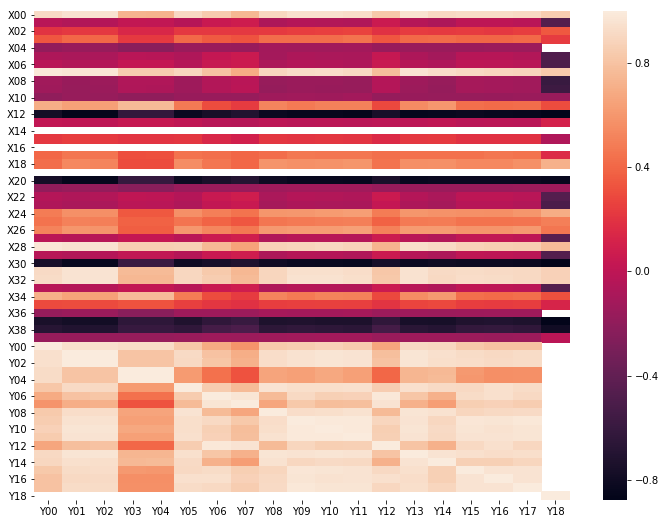

In [58]:
yCorr = corrmat[['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17','Y18']]
yCorr

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(yCorr)

In [34]:
trainNotNull = train[train['Y18'].notnull()]
trainNotNull = trainNotNull.drop(['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17'], axis=1)
trainNotNull

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y18
id,,,,,,,,,,,,,,,,,,,,,
4320,19.3,987.7,0.9,2.2,0.0,1007.7,988.0,20.8,1007.8,1007.4,...,18.0,18.7,1008.3,0.00,353.5,0.0,84.0,77.6,0.0,20.5
4321,19.0,987.6,1.9,2.2,0.0,1007.7,988.0,20.6,1007.8,1007.4,...,17.7,19.0,1008.3,0.00,303.1,0.0,84.4,79.2,0.0,20.5
4322,19.1,987.6,2.0,1.4,0.0,1007.8,988.1,20.5,1007.9,1007.4,...,17.4,19.2,1008.3,0.00,307.3,0.0,84.9,79.9,0.0,20.5
4323,19.2,987.7,1.8,1.5,0.0,1007.9,988.1,20.5,1007.9,1007.5,...,17.5,19.3,1008.4,0.00,315.6,0.0,84.9,80.7,0.0,20.5
4324,19.2,987.8,1.4,1.4,0.0,1007.9,988.1,20.5,1007.8,1007.6,...,17.4,19.5,1008.4,0.00,321.2,0.0,84.9,80.9,0.0,20.5
4325,19.0,987.9,1.5,1.2,0.0,1007.8,988.1,20.4,1008.0,1007.7,...,17.4,19.6,1008.4,0.00,287.4,0.0,85.2,81.3,0.0,20.5
4326,19.1,987.9,1.2,1.0,0.0,1007.8,988.1,20.3,1008.0,1007.7,...,17.3,19.8,1008.3,0.00,330.5,0.0,85.2,80.8,0.0,20.5
4327,19.3,987.8,0.7,0.6,0.0,1007.8,988.1,20.4,1008.0,1007.6,...,17.3,19.7,1008.4,0.00,352.3,0.0,85.2,80.8,0.0,20.5
4328,19.1,987.7,2.7,0.1,0.0,1007.7,988.1,20.4,1008.0,1007.5,...,17.5,19.7,1008.4,0.00,305.1,0.0,85.3,80.6,0.0,20.5


In [44]:
# trainNotNull.isnull().sum()

In [43]:
trainNotNullCorr = trainNotNull.corr()
# trainNotNullCorr['Y18']

In [47]:
columnList = trainNotNull.columns
target_var = ['Y18']
input_var = list(filter(lambda x:x != 'Y18', columnList))

In [49]:
X_train = trainNotNull[input_var]
y_train = trainNotNull[target_var]

In [42]:
## 참고 예제
## https://jaehyeongan.github.io/2019/07/08/Kaggle-challenge-%EB%B3%B4%EC%8A%A4%ED%84%B4-%EC%A7%91%EA%B0%92-%EC%98%88%EC%B8%A1-House-Prices-Advanced-Regression-Techniques/
xxgb = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)

In [63]:
print(X_train.shape)
print(y_train.shape)

(432, 40)
(432, 1)


In [64]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param = {
    'max_depth':[2,3,4],
    'n_estimators':range(550,700,50),
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=5, 
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

[17:17:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bylevel': 1, 'colsample_bytree': 1, 'max_depth': 3, 'n_estimators': 650}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=650,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [65]:
A_train, A_val, b_train, b_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

In [66]:
print(A_train)
print(A_val)
print(b_train)
print(b_val)

X00    X01  X02  X03  X04     X05    X06   X07     X08     X09  ...  \
id                                                                     ...   
4638  18.7  986.5  0.9  0.7  0.0  1006.3  986.4  19.7  1006.4  1006.3  ...   
4645  19.1  986.7  0.7  2.7  0.0  1006.5  986.7  19.4  1006.7  1006.5  ...   
4732  24.1  986.5  1.2  1.5  0.0  1005.4  986.7  23.0  1006.5  1006.0  ...   
4511  21.1  986.9  1.1  1.5  0.0  1006.7  987.1  21.7  1006.9  1006.5  ...   
4516  23.1  986.5  0.5  1.4  0.0  1006.4  987.0  22.2  1006.7  1005.9  ...   
4504  19.7  986.7  0.5  1.1  0.0  1006.5  987.3  20.6  1007.1  1006.4  ...   
4683  26.8  986.1  1.2  2.1  0.0  1005.4  986.1  27.7  1005.5  1005.3  ...   
4593  22.5  986.0  1.2  1.3  0.0  1005.8  986.2  22.8  1005.9  1005.6  ...   
4559  28.4  984.1  1.1  2.4  0.0  1003.9  984.2  28.6  1003.4  1003.0  ...   
4591  23.1  985.8  1.1  1.1  0.0  1005.6  986.0  23.2  1005.7  1005.3  ...   
4545  27.1  984.9  1.7  1.2  0.0  1004.7  985.0  27.5  1004.2  1004.0  

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
pred_train = grid_search.predict(A_train)
pred_val = grid_search.predict(A_val)

print('train mae score: ', mean_absolute_error(b_train, pred_train))
print('val mae score:', mean_absolute_error(b_val, pred_val))

train mae score:  0.023737982045049254
val mae score: 0.022665264962733477


In [71]:
test = pd.read_csv('./data/test.csv', index_col='id')

In [72]:
test.head()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
id,,,,,,,,,,,,,,,,,,,,,
4752,18.7,987.4,1.5,1.3,0.0,1006.8,987.7,21.1,1007.5,1007.2,...,91.4,17.5,19.2,1007.6,0.0,194.7,0.0,84.0,59.9,0.0
4753,18.8,987.4,1.1,1.2,0.0,1006.7,987.7,21.2,1007.5,1007.2,...,91.6,17.4,19.1,1007.5,0.0,173.1,0.0,84.0,60.5,0.0
4754,19.0,987.4,1.3,1.2,0.0,1006.6,987.6,21.2,1007.4,1007.2,...,92.0,17.2,19.0,1007.5,0.0,208.6,0.0,85.0,60.8,0.0
4755,18.7,987.4,2.3,0.8,0.0,1006.6,987.6,21.1,1007.4,1007.2,...,93.0,17.2,18.8,1007.4,0.0,185.0,0.0,85.8,61.2,0.0
4756,18.4,987.4,1.1,0.7,0.0,1006.7,987.7,20.9,1007.5,1007.2,...,92.3,17.4,18.9,1007.5,0.0,162.8,0.0,87.3,61.7,0.0


In [74]:
testPred = grid_search.predict(test)

In [76]:
testPred

array([20.806097, 20.808483, 20.774141, ..., 27.380178, 26.792683,
       26.872126], dtype=float32)

In [79]:
outputDf = pd.DataFrame()
outputDf['id'] = test.index
outputDf['Y18'] = testPred

In [81]:
outputDf.to_csv('submission.csv', index=False)